<a href="https://colab.research.google.com/github/noushadkhan01/tensorflow/blob/master/classification/bank_customers_calssification_for_exiting_the_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()

In [13]:
!ls

Machine-Learning  sample_data  tensorflow


In [14]:
!git clone https://github.com/noushadkhan01/tensorflow.git

fatal: destination path 'tensorflow' already exists and is not an empty directory.


In [15]:
!ls

Machine-Learning  sample_data  tensorflow


In [16]:
df = pd.read_csv('tensorflow/classification/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## check for null values

In [20]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

**^^as u can see there is no null value**

In [21]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [22]:
np.log1p(df.Age).skew()

0.20336041516983316

## import important dependencies

In [0]:
import tensorflow as tf
from tensorflow import keras

In [24]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [25]:
df = df.iloc[:, 3:]
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [26]:
df = pd.get_dummies(df, drop_first = True)
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [27]:
X = df.drop('Exited', 1)
y = df.Exited
X.shape, y.shape

((10000, 11), (10000,))

## StandardScaler

We need to scale out data before applying to neural network becuase of speed

In [0]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [0]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train[:1], X_test[:1]

(array([[-0.09792126, -0.55759842, -1.03635146,  1.13249447,  0.81039385,
          0.64198477,  0.96683535, -0.76862426, -0.56987189, -0.5731713 ,
          0.92295821]]),
 array([[-0.56233235, -0.39245718,  1.00826365,  0.83794103, -0.87153075,
          0.65569297,  0.97823676,  1.61444413,  1.66826321, -0.57529746,
         -1.12586575]]))

In [32]:
y_train = y_train.values
y_test = y_test.values
y_train[:2], y_test[:2]

(array([1, 0]), array([0, 1]))

# Make ANN

In [0]:
from tensorflow import keras

## import Sequential from keras
**it is required to initialize our neural network model**

### Step 1:- create ann model by sequential

In [73]:
#1 first initialize our keras model by Sequential
model = keras.models.Sequential()
model

### Step 2:- Add dense layer

if a data is linenarly separable then their is no need to add hidden layer or don't even need a neural networks by convention

**Tip:-- ** no. of nodes in hidden layers is the average of no. of nodes in input layers and no. of node in output layer

In [35]:
ninput = 11 #no of independent variables
noutput = 1 #output is either 1 or either 0 so no of hidden layers in output is 1
nhidden = (ninput + noutput) / 2
nhidden

6.0

In [0]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu, input_dim = 11))

In [75]:
model

### add 2nd layer

In [76]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu))
model

### Step 3:- add output layer

**there are two types of activation function for output of categorical varibles **
- 1**softmax**, which is used when dependent varible have more than two categorical variables
- 2 **sigmoid** , which is used when dependent varable have 2 categorical variables

In [0]:
model.add(keras.layers.Dense(units = 1, activation = tf.nn.sigmoid))

In [78]:
model

## Step 4:-- compile the model
apply stochastic gradient descent method

In [79]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model

### Step 5:-- fit the model

batch_size = no. of observation afterwhich u want to update the weights

In [80]:
model.fit(X_train, y_train, batch_size = 10 , epochs = 100, class_weight = 'balance')

Epoch 1/100
7000/7000 [==============================] - 1s 155us/step - loss: 0.5290 - acc: 0.7543
Epoch 2/100
7000/7000 [==============================] - 1s 120us/step - loss: 0.4389 - acc: 0.7994
Epoch 3/100
7000/7000 [==============================] - 1s 116us/step - loss: 0.4216 - acc: 0.8053
Epoch 4/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.4071 - acc: 0.8177
Epoch 5/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3896 - acc: 0.8324
Epoch 6/100
7000/7000 [==============================] - 1s 111us/step - loss: 0.3741 - acc: 0.8424
Epoch 7/100
7000/7000 [==============================] - 1s 100us/step - loss: 0.3642 - acc: 0.8461
Epoch 8/100
7000/7000 [==============================] - 1s 100us/step - loss: 0.3593 - acc: 0.8511
Epoch 9/100
7000/7000 [==============================] - 1s 102us/step - loss: 0.3566 - acc: 0.8534
Epoch 10/100
7000/7000 [==============================] - 1s 99us/step - loss: 0.3549 - acc: 0.8530


### Step 7:- make predictions

In [81]:
y_pred = model.predict(X_test)
y_pred[:2]

array([[0.21403645],
       [0.2774569 ]], dtype=float32)

In [82]:
y_pred.max()

0.9999527

In [83]:
y_pred.min()

0.0002837267

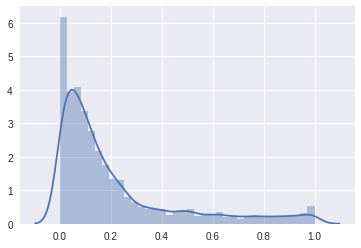

In [84]:
sns.distplot(y_pred)

In [85]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [0 0 0] 

confusion matrix is

 [[2283   96]
 [ 318  303]] 


Precision score is :- 0.7593984962406015
Recall score is :- 0.48792270531400966
Classification report is 

             precision    recall  f1-score   support

          0       0.88      0.96      0.92      2379
          1       0.76      0.49      0.59       621

avg / total       0.85      0.86      0.85      3000



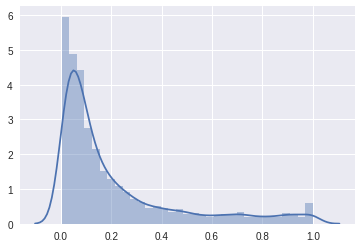

In [54]:
sns.distplot(y_pred)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [68]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [0 0 0] 

confusion matrix is

 [[2276  103]
 [ 324  297]] 


Precision score is :- 0.7425
Recall score is :- 0.4782608695652174
Classification report is 

             precision    recall  f1-score   support

          0       0.88      0.96      0.91      2379
          1       0.74      0.48      0.58       621

avg / total       0.85      0.86      0.85      3000



In [69]:
f_ypred = np.array([1 if i > .6 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [0 0 0] 

confusion matrix is

 [[2317   62]
 [ 361  260]] 


Precision score is :- 0.8074534161490683
Recall score is :- 0.41867954911433175
Classification report is 

             precision    recall  f1-score   support

          0       0.87      0.97      0.92      2379
          1       0.81      0.42      0.55       621

avg / total       0.85      0.86      0.84      3000



# By RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

----------------------------------------

max_depth is 1
Train score is 0.6007142857142858
Test score is 0.6013333333333334
confusion_matrix is 
[[1400  979]
 [ 217  404]] 

----------------------------------------
----------------------------------------

max_depth is 2
Train score is 0.7842857142857143
Test score is 0.7786666666666666
confusion_matrix is 
[[1871  508]
 [ 156  465]] 

----------------------------------------
----------------------------------------

max_depth is 3
Train score is 0.7612857142857142
Test score is 0.7606666666666667
confusion_matrix is 
[[1815  564]
 [ 154  467]] 

----------------------------------------
----------------------------------------

max_depth is 4
Train score is 0.8097142857142857
Test score is 0.7993333333333333
confusion_matrix is 
[[1951  428]
 [ 174  447]] 

----------------------------------------
----------------------------------------

max_depth is 5
Train score is 0.7932857142857143
Test score is 0.7813333333333333
confusion_matrix

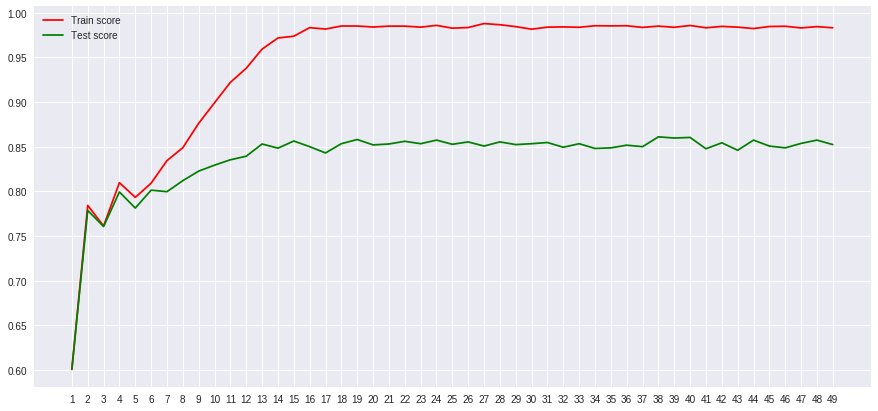

In [99]:
t = []
s = []
x = range(1, 50)
for i in x:
  clf = RandomForestClassifier(max_depth = i, class_weight = 'balanced').fit(X_train, y_train)
  a = clf.score(X_train, y_train)
  b = clf.score(X_test, y_test)
  t.append(a)
  s.append(b)
  print('-'*40)
  print(f'\nmax_depth is {i}')
  print(f'Train score is {a}')
  print(f'Test score is {b}')
  c = confusion_matrix(y_test, clf.predict(X_test))
  print(f'confusion_matrix is \n{c} \n')
  print('-'*40)
  
plt.figure(figsize = (15, 7))
plt.plot(x, t, label = 'Train score', c = 'r')
plt.plot(x, s, label = 'Test score', c = 'g')
plt.xticks(x)
plt.legend()
plt.show()

----------------------------------------

max_depth is 1
Train score is 0.7977142857142857
Test score is 0.793
confusion_matrix is 
[[2379    0]
 [ 621    0]] 

----------------------------------------
----------------------------------------

max_depth is 2
Train score is 0.8171428571428572
Test score is 0.8136666666666666
confusion_matrix is 
[[2373    6]
 [ 553   68]] 

----------------------------------------
----------------------------------------

max_depth is 3
Train score is 0.8205714285714286
Test score is 0.8193333333333334
confusion_matrix is 
[[2365   14]
 [ 528   93]] 

----------------------------------------
----------------------------------------

max_depth is 4
Train score is 0.8408571428571429
Test score is 0.8473333333333334
confusion_matrix is 
[[2359   20]
 [ 438  183]] 

----------------------------------------
----------------------------------------

max_depth is 5
Train score is 0.8557142857142858
Test score is 0.857
confusion_matrix is 
[[2336   43]
 [ 386  

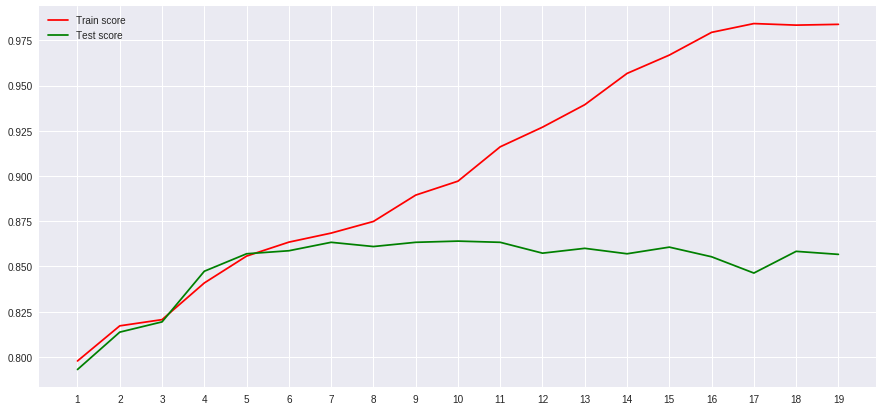

In [97]:
t = []
s = []
x = range(1, 20)
for i in x:
  clf = RandomForestClassifier(max_depth = i, class_weight = 'balanced').fit(X_train, y_train)
  a = clf.score(X_train, y_train)
  b = clf.score(X_test, y_test)
  t.append(a)
  s.append(b)
  print('-'*40)
  print(f'\nmax_depth is {i}')
  print(f'Train score is {a}')
  print(f'Test score is {b}')
  c = confusion_matrix(y_test, clf.predict(X_test))
  print(f'confusion_matrix is \n{c} \n')
  print('-'*40)
  
plt.figure(figsize = (15, 7))
plt.plot(x, t, label = 'Train score', c = 'r')
plt.plot(x, s, label = 'Test score', c = 'g')
plt.xticks(x)
plt.legend()
plt.show()

In [89]:
clf.score(X_test, y_test)

0.8606666666666667

In [91]:
clf.score(X_train, y_train)

0.9837142857142858

# MinorClass Up sampling

In [100]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [102]:
sum(df.isnull().sum())

0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


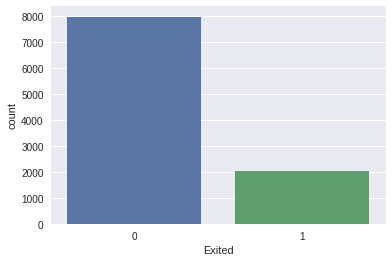

In [101]:
sns.countplot(df.Exited)

In [109]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [0]:
from sklearn.utils import resample

In [112]:
# Separate majority and minority classes
df_majority = df[df.Exited ==0]
df_minority = df[df.Exited ==1]
print(f'majority shape is {df_majority.shape}, minority shape is {df_minority.shape}')
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Exited.value_counts()

majority shape is (7963, 12), minority shape is (2037, 12)


1    7963
0    7963
Name: Exited, dtype: int64

In [113]:
df_upsampled.shape

(15926, 12)

In [0]:
df2 = df_upsampled.copy()

In [116]:
X = df2.drop('Exited', 1)
y =df2.Exited
X.shape, y.shape

((15926, 11), (15926,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [135]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train[:1], X_test[:1]

(array([[ 1.18639954, -0.67762727,  0.34414616,  0.39315362, -0.75391958,
         -1.53651172,  1.10206221,  0.64617005,  1.49281511, -0.54500749,
         -1.01993311]]),
 array([[-0.8187994 , -0.29431478, -1.34935808,  0.73492   , -0.75098819,
          0.64475088, -0.92573014,  0.82664361,  1.46192652, -0.54138598,
          1.        ]]))

In [0]:
y_train = y_train.values
y_test = y_test.values

In [137]:
y_train[0], y_test[0]

(1, 1)

## Train model

In [0]:
import tensorflow as tf
from tensorflow import keras

In [157]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(9, activation = tf.nn.relu, input_dim = 11))
model.add(keras.layers.Dense(9, activation = tf.nn.relu)) #their is no need to define the shape of data again it's only need to define when first layers adding
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
11148/11148 [==============================] - 1s 114us/step - loss: 0.6381 - acc: 0.6359
Epoch 2/100
11148/11148 [==============================] - 1s 46us/step - loss: 0.5663 - acc: 0.7164
Epoch 3/100
11148/11148 [==============================] - 0s 43us/step - loss: 0.5282 - acc: 0.7465
Epoch 4/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.5035 - acc: 0.7558
Epoch 5/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.4896 - acc: 0.7654
Epoch 6/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.4814 - acc: 0.7710
Epoch 7/100
11148/11148 [==============================] - 0s 39us/step - loss: 0.4756 - acc: 0.7705
Epoch 8/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.4715 - acc: 0.7744
Epoch 9/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.4681 - acc: 0.7764
Epoch 10/100
11148/11148 [==============================] - 0s 40us/step - loss: 0.4656 - 

In [158]:
y_pred = model.predict(X_test)
y_pred[:3]

array([[0.7844013 ],
       [0.99626017],
       [0.31666204]], dtype=float32)

In [159]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_pred])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_test, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_test, f_ypred)}')
print(f'Recall score is :- {recall_score(y_test, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_test, f_ypred)}')

predicted binary's first three values are [1 1 0] 

confusion matrix is

 [[1928  436]
 [ 580 1834]] 


Precision score is :- 0.8079295154185022
Recall score is :- 0.7597348798674399
Classification report is 

             precision    recall  f1-score   support

          0       0.77      0.82      0.79      2364
          1       0.81      0.76      0.78      2414

avg / total       0.79      0.79      0.79      4778



In [0]:
y_predtrain = model.predict(X_train)

In [162]:
f_ypred = np.array([1 if i > .5 else 0 for i in y_predtrain])
print(f'predicted binary\'s first three values are {f_ypred[:3]} \n')
c = confusion_matrix(y_train, f_ypred)
print(f'confusion matrix is\n\n {c} \n\n')
print(f'Precision score is :- {precision_score(y_train, f_ypred)}')
print(f'Recall score is :- {recall_score(y_train, f_ypred)}')

print(f'Classification report is \n\n{classification_report(y_train, f_ypred)}')

predicted binary's first three values are [1 0 1] 

confusion matrix is

 [[4588 1011]
 [1231 4318]] 


Precision score is :- 0.8102833552261213
Recall score is :- 0.7781582267075149
Classification report is 

             precision    recall  f1-score   support

          0       0.79      0.82      0.80      5599
          1       0.81      0.78      0.79      5549

avg / total       0.80      0.80      0.80     11148

